<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/4Dropped_Neural_Network_Multi_Classs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
df = df[df['n/m']==2]

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] #cple
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
names = ['indeks', 'n', 'n/m', '(n/m)^2', '(n/m)^3', 'm/n', 'av.length', 'std.dev', 'median', 'range', 'min', 'max', 'k']




In [2]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)

In [3]:
names = [ 'av.length', 'n', 'std.dev', 'max']
X_modified = X.drop([  'm', 'k','n/m', 'range', 'indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n','median', 'min'], axis = 1)
print(X_modified.head())
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(random_state=0)
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)





     n   av.length     std.dev  max
0  160   99.093750   20.281895  151
1   60   49.150002   29.713789   99
2   60   74.566666   14.820241  100
3  120  288.391663  106.842712  478
4  140   74.571426   13.985677  100


In [4]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [5]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()


X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.83)
print(X_train.shape[0])
print(X_test.shape[0])

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)



1267
260


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(8, input_dim = X_modified.shape[1], activation='relu'))

classifier.add(Dense(16, activation = 'relu'))
classifier.add(Dropout(0.25))

#classifier.add(Dense(32, activation = 'relu'))

#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(32, activation = 'relu'))
#classifier.add(Dense(16, activation = 'relu'))

#classifier.add(Dense(16, activation='relu'))

#classifier.add(Dense(8, activation='relu'))

#classifier.add(Dense(12, activation='relu'))

classifier.add(Dense(8, activation='relu'))
classifier.add(Dropout(0.25))


classifier.add(Dense(4, activation='relu'))


classifier.add(Dense(3, activation = 'softmax'))
classifier.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
 dense_4 (Dense)             (None, 3)                 1

In [7]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 25, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 64, 
                    epochs = 500)



Epoch 1/500
20/20 [==============================] - 1s 2ms/step - loss: 1.0661 - accuracy: 0.3749
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 1.0341 - accuracy: 0.4436
Epoch 3/500
20/20 [==============================] - 0s 3ms/step - loss: 1.0098 - accuracy: 0.4696
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 1.0065 - accuracy: 0.4972
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.9854 - accuracy: 0.5296
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.9657 - accuracy: 0.5399
Epoch 7/500
20/20 [==============================] - 0s 5ms/step - loss: 0.9576 - accuracy: 0.5525
Epoch 8/500
20/20 [==============================] - 0s 3ms/step - loss: 0.9375 - accuracy: 0.5501
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.9230 - accuracy: 0.5525
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.9150 - accuracy: 0.5643
Epoch 11/

accuracy: 87.31%


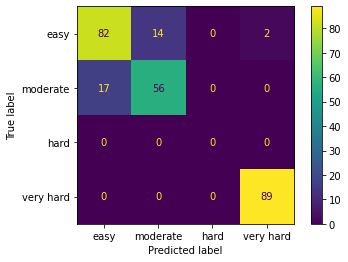

In [8]:
from keras.metrics import accuracy
pred = classifier.predict(X_test)
pred_ = np.argmax(pred, axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
cmd.plot()

cnt = 0
cnt_correct = 0
for i in range(len(pred)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
print(f'accuracy: {(cnt_correct/cnt)*100:.2f}%')



In [9]:
from keras.metrics import accuracy


av_bad = []
n_bad = []
std_dev_bad = []
max_bad = []
print("very hard <- easy")
for i in range(len(pred_)):
  cnt += 1
  if(pred_[i] == true_y[i]):
    cnt_correct += 1
  if(pred_[i] == 3 and true_y[i] == 0):
    av_bad.append(X_test_copy.iloc[i]['av.length'])
    n_bad.append(X_test_copy.iloc[i]['n'])
    std_dev_bad.append(X_test_copy.iloc[i]['std.dev'])
    max_bad.append(X_test_copy.iloc[i]['max'])
    for j in range(len(names)):
      print(names[j]+"->"+str(X_test_copy.iloc[i][names[j]]))
    print("------------------------------------------------------------------")

very hard <- easy
av.length->385.279999
n->100.0
std.dev->114.22422
max->737.0
------------------------------------------------------------------
av.length->415.119995
n->100.0
std.dev->111.858437
max->763.0
------------------------------------------------------------------


In [16]:
av_good = []
n_good = []
std_dev_good = []
max_good = []
for i in range(len(pred_)):
  if(pred_[i] == 3 and true_y[i] == 3):
    av_good.append(X_test_copy.iloc[i]['av.length'])
    n_good.append(X_test_copy.iloc[i]['n'])
    std_dev_good.append(X_test_copy.iloc[i]['std.dev'])
    max_good.append(X_test_copy.iloc[i]['max'])


av_good2 = []
n_good2 = []
std_dev_good2 = []
max_good2 = []

for i in range(len(pred)):
  if(pred_[i] == 0 and true_y[i] == 0):
    av_good2.append(X_test_copy.iloc[i]['av.length'])
    n_good2.append(X_test_copy.iloc[i]['n'])
    std_dev_good2.append(X_test_copy.iloc[i]['std.dev'])
    max_good2.append(X_test_copy.iloc[i]['max'])

some easy->easy


ROC AUC score: 0.9020595822251115


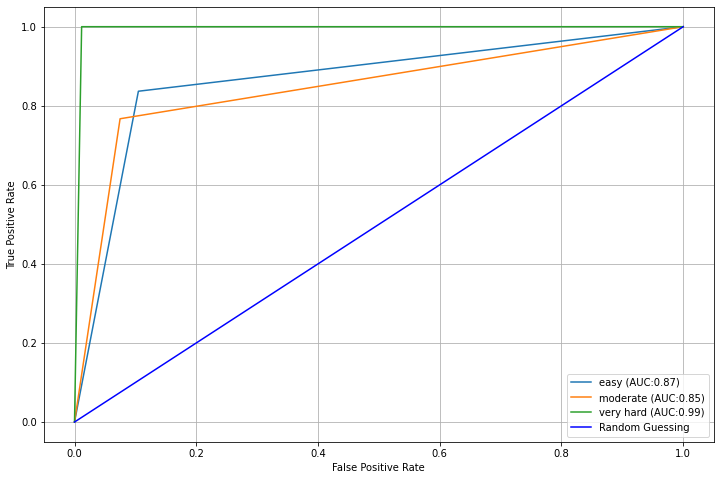

In [12]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate',  'very hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()

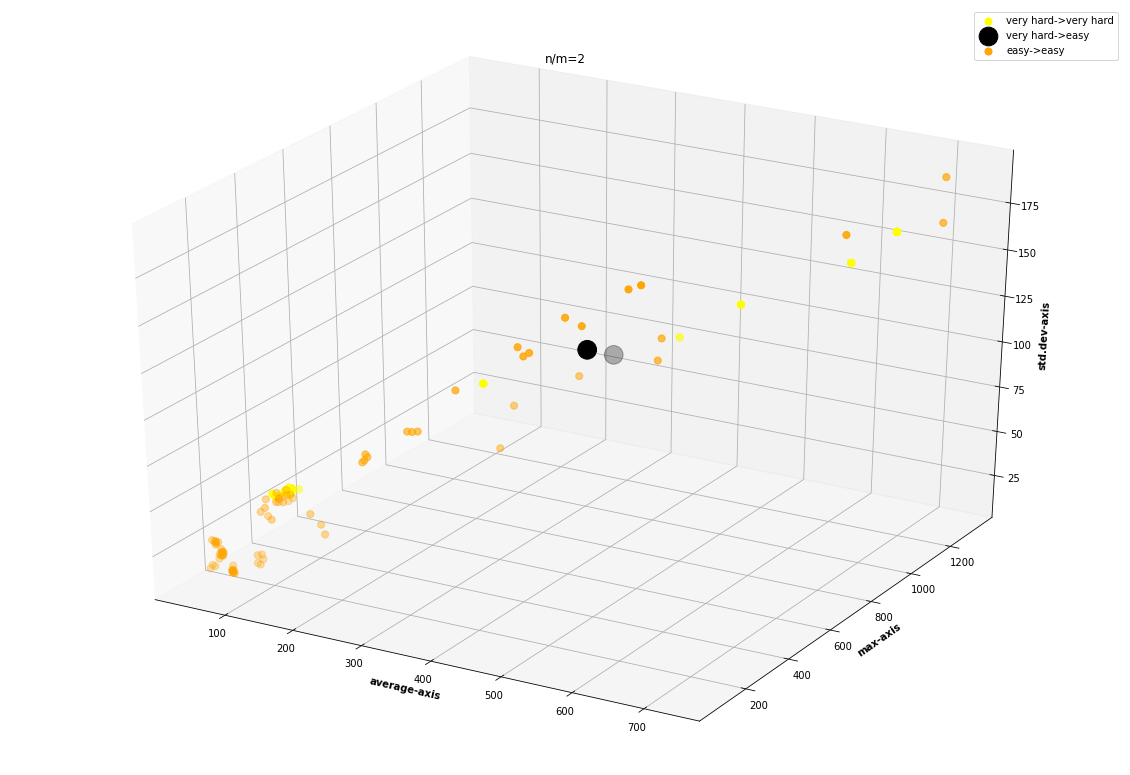

In [20]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize = (20, 14))
ax = plt.axes(projection ="3d")
   
ax.grid(b = True, color ='white',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)

ax.scatter3D(av_good, max_good, std_dev_good, s = 50, color = 'yellow')
ax.scatter3D(av_bad, max_bad, std_dev_bad, s = 350, color = 'black')
ax.scatter3D(av_good2, max_good2, std_dev_good2, s = 50, color = 'orange')


plt.title("n/m=2")
ax.set_xlabel('average-axis', fontweight ='bold')
ax.set_ylabel('max-axis', fontweight ='bold')
ax.set_zlabel('std.dev-axis', fontweight ='bold')
ax.legend(['very hard->very hard', 'very hard->easy', 'easy->easy'])
 
# show plot
plt.show()

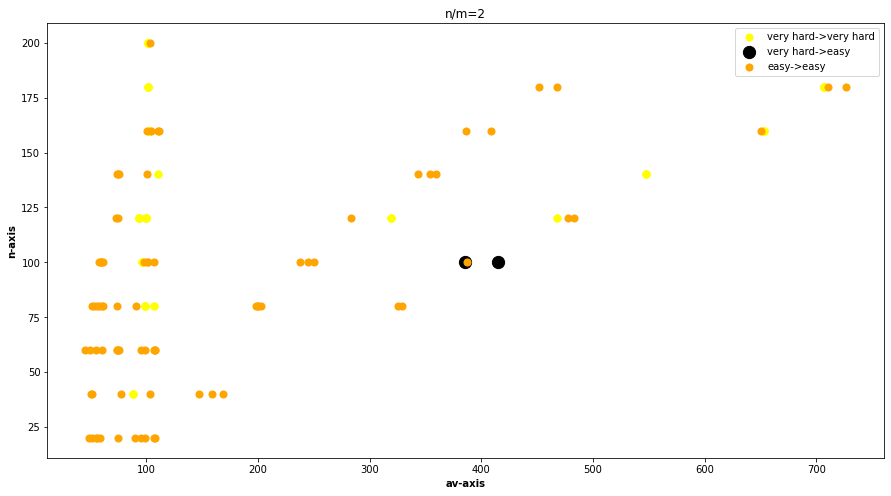

In [22]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes()

ax.scatter(av_good, n_good, s = 50, color = 'yellow')
ax.scatter(av_bad, n_bad, s = 150, color = 'black')
ax.scatter(av_good2, n_good2, s = 50, color = 'orange')


ax.set_xlabel('av-axis', fontweight ='bold')
ax.set_ylabel('n-axis', fontweight ='bold')

ax.legend(['very hard->very hard', 'very hard->easy', 'easy->easy'])
plt.title("n/m=2")

# show plot
plt.show()


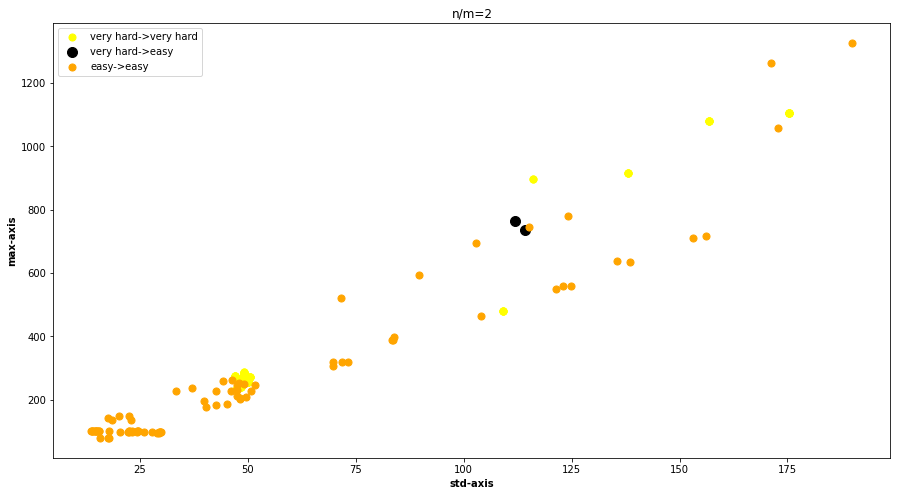

In [23]:
fig = plt.figure(figsize = (15, 8))
ax = plt.axes()

ax.scatter(std_dev_good, max_good, s = 50, color = 'yellow')
ax.scatter(std_dev_bad, max_bad, s = 100, color = 'black')
ax.scatter(std_dev_good2, max_good2, s = 50, color = 'orange')


ax.set_xlabel('std-axis', fontweight ='bold')
ax.set_ylabel('max-axis', fontweight ='bold')
plt.title("n/m=2")

ax.legend(['very hard->very hard', 'very hard->easy', 'easy->easy'])
 
# show plot
plt.show()